|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|



### Section18.4, Réacteur chimique homogène

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/Chap-18-Section-18-4.png'>

Voir les hypothèses dans le livre de Transport Phenomena.


In [1]:
#
# Pierre Proulx
#
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

In [2]:
# Paramètres, variables et fonctions

z,L,k_1,C_A0,D_AB,S,delta_z=sp.symbols('z,L,k_1,C_A0,D_AB,S,delta_z')                                                            
N_A=sp.symbols('N_A')
C_A=sp.Function('C_A')(z)     

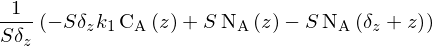

In [3]:
#
# Bilan sur le réacteur, divisé tout de suite par le volume différentiel
#
eq=(S*N_A(z)-S*N_A(z+delta_z)-k_1*C_A*S*delta_z)/(S*delta_z)
display(eq)

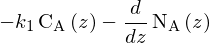

In [4]:
eq=sp.limit(eq,delta_z,0).doit()
display(eq)

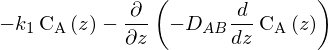

In [5]:
fick=-D_AB*sp.diff(C_A,z)
eq=eq.subs(N_A(z),fick)
display(eq)

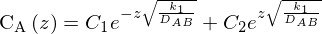

In [6]:
C_A=sp.dsolve(eq,C_A)
display(C_A)
C=C_A                    # je garde une copie de l'expression pour plus tard

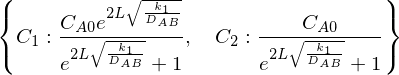

In [7]:
C_A=C_A.rhs
# Pose et solution des 2 équations de conditions aux limites pour C1 et C2
condition_1=sp.Eq(C_A.diff(z).subs(z,L ),0) 
condition_2=sp.Eq(C_A.subs(z,0)-C_A0,0)
constantes=sp.solve([condition_1,condition_2],sp.symbols('C1,C2') )            
display(constantes)

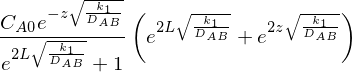

In [8]:
C_A1=C_A.subs(constantes)
display(C_A1.simplify())

On peut maintenant utiliser la solution pour calculer , par exemple, la quantité de la substance A qui réagit dans le réacteur. Elle est obtenue en multipliant le flux molaire en z=0 par la surface, donc:

$ W_A = S * N_A $ en z=0 donc $ W_A = S * (-D_{AB}) \frac {dC_A}{dz}_{z=0} $

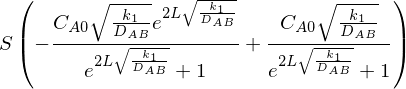

In [9]:
W_A=S*C_A1.diff(z).subs(z,0)
display(W_A)

____

# Reprenons l'exemple précédent , en modifiant la condition à la limite z=L

____

## Le problème développé à la section 18.4 est identique au problème d'ailette traité à la section 10.7. 

### 1. Au lieu de considérer la fond du réacteur comme imperméable, on pourrait considérer qu'il contient un catalyseur rapide. La condition en z=L deviendrait que $C_{AL}=0$

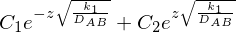

In [10]:
#
# Reprenons C, la copie de C_A qu'on a fait avant d'y substituer les conditions aux limites
#
C_A=C.rhs
display(C_A)

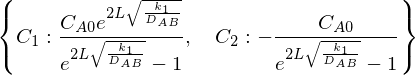

In [11]:
#
# Pose et solution des 2 équations de conditions aux limites pour C1 et C2
condition_1=sp.Eq(C_A.subs(z,L ),0) 
condition_2=sp.Eq(C_A.subs(z,0)-C_A0,0)
constantes=sp.solve([condition_1,condition_2],sp.symbols('C1,C2') )              
display(constantes)

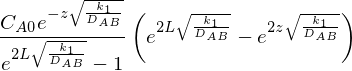

In [12]:
C_A2=C_A.subs(constantes)
display(C_A2.simplify())

____

### 2. Au lieu de considérer la fond du réacteur comme imperméable, on pourrait considérer qu'il contient un catalyseur réel. La condition en z=L deviendrait que la concentration est déterminée par la vitesse de réaction de surface donc: 
### $ -D_{AB} \frac {dC_A}{dz} = k_s C_A $ en z=L

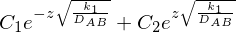

In [13]:
#
# Reprenons encore C, la copie de C_A avant d'y substituer les conditions aux limites
#
C_A=C.rhs
display(C_A)

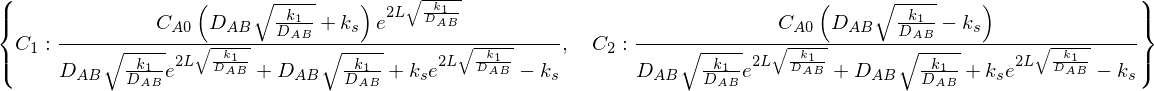

In [14]:
#
# Pose et solution des 2 équations de conditions aux limites pour C1 et C2
k_s=sp.symbols('k_s')
condition_1=sp.Eq(-D_AB*C_A.diff(z).subs(z,L)-k_s*C_A.subs(z,L))
condition_2=sp.Eq(C_A.subs(z,0)-C_A0,0)
constantes=sp.solve([condition_1,condition_2],sp.symbols('C1,C2') )              
display(constantes)

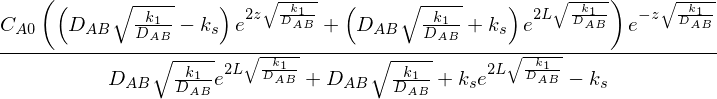

In [15]:
C_A3=C_A.subs(constantes)
display(C_A3.simplify())

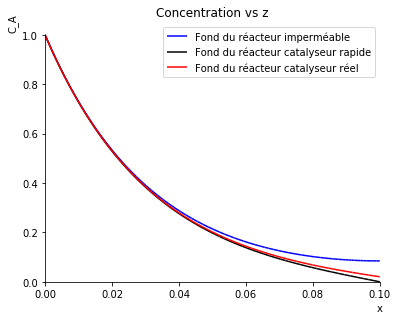

In [16]:
#
# On peut maintenant tracer, en donnant des valeurs pour les paramètres.
#
dico={'D_AB':1.e-10,'C_A0':1,'L':0.1,'k_1':1.e-7,'k_s':1e-8}
C_A1p=C_A1.subs(dico).evalf()
C_A2p=C_A2.subs(dico).evalf()
C_A3p=C_A3.subs(dico).evalf()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=6,5
p=sp.plot((C_A1p,(z,0,L.subs(dico))),(C_A2p,(z,0,L.subs(dico))),(C_A3p,(z,0,L.subs(dico))),
        title='Concentration vs z',ylabel='C_A',show=False,legend=True)
p[0].line_color = 'blue'
p[0].label='Fond du réacteur imperméable'
p[1].line_color = 'black'
p[1].label='Fond du réacteur catalyseur rapide'
p[2].line_color = 'red'
p[2].label='Fond du réacteur catalyseur réel'
p.show()